<a href="https://colab.research.google.com/github/vcshaffe/MAT-421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 Numerical Error and Instability

There are 2 main issues with integration schemes for ODEs: accuracy and stability. 

Accuracy - The scheme's ability to get close to the exact solution as a function of the step size h. (O(h^p))

Stability - The scheme's ability to keep error from growing as it integrates forward in time.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

<ipython-input-1-c8f64572e20b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


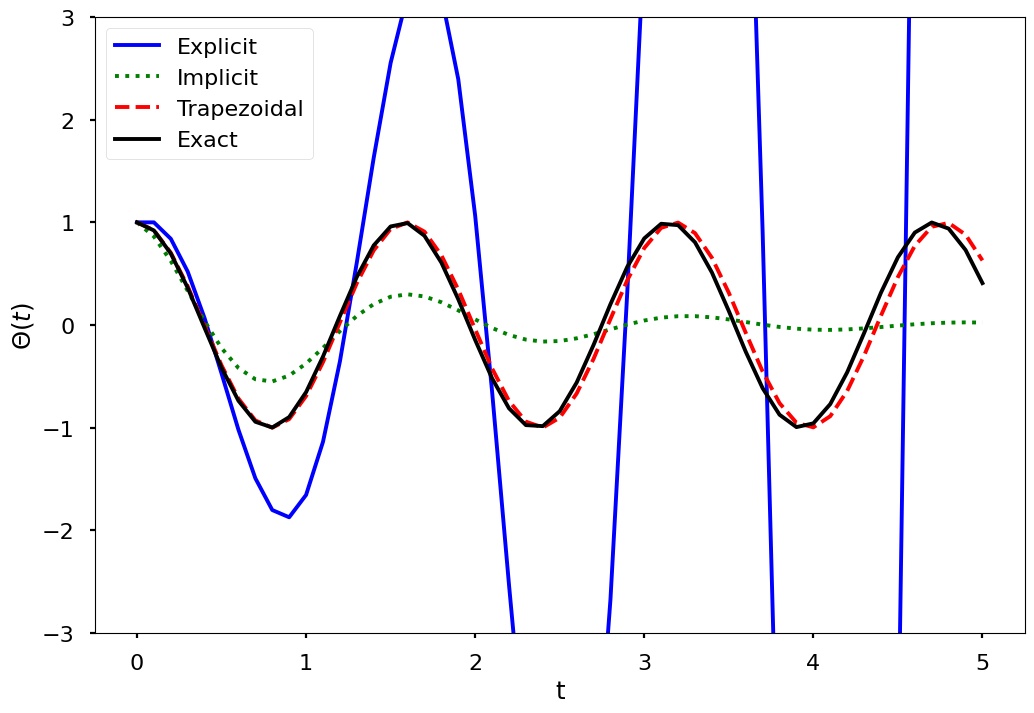

In [3]:
#define step size
h = 0.1
#define numerical grid
t = np.arange(0, 5.1, h)
#oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

#do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

# 22.5 Predictor-Corrector and Runge Kutta Methods

**Predictor-Corrector Methods**

Given any time and state value, the function, F(t,S(t)) returns the change of state dS(t)/dt. Predictor-Corrector methods of solving IVPs improve the approximation accuracy of non-predictor-corrector methods by querying the F function several times at different locations, then using a weighted average of the results to update the state.

This method utilizes two formulas: the predictor and corrector.

Midpoint Method:

S(t_j + h/2) = S(t_j) + (h/2)*F(t_j,S(t_j)) 

which is the prediction of the solution value halfway between t_j and t_(j+1).

It then computes the corrector step:

S(t_(j+1)) = S(t_j) + h*F(t_j + h/2, S(t_j + h/2)).

which computes the solution at S(t_j+1) from S(t_j) but using the derivative from S(t_j + h/2)

**Runge Kutta Methods**

Runge Kutta (RK) methods are one of the most widely used methods for solving ODEs. The Euler method uses the first two terms in Taylor series, which is linear, but we can improve the accuracy of numerical integration if we keep more terms in the approximation.

There is the second order RK method, however this is less accurate, but more importantly, we can use this method to derive the more accurate and commonly used fourth-order RK method, which takes a weighted average fo the four points k1,k2,k3,k4:

k1 = F(t_j, S(t_j))
k2 = F(t_j + h/2, S(t_j) + 1/2*k1*h)
k3 = F(t_j + h/2, S(t_j_ + 1/2*k2*h)
k4 = F(t_j + h, S(t_j) + k3*h)

Thus, we have

S(t_j+1) = S(t_j) + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

and we have that the RK4 method is fourth-order accurate, or O(h^4)





# 22.6 Python ODE Solvers

We can solve IVT problems using scipy's built-in functions, such as scipy.integrate.solve_ivp

<ipython-input-4-fe25ee2ca8f3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


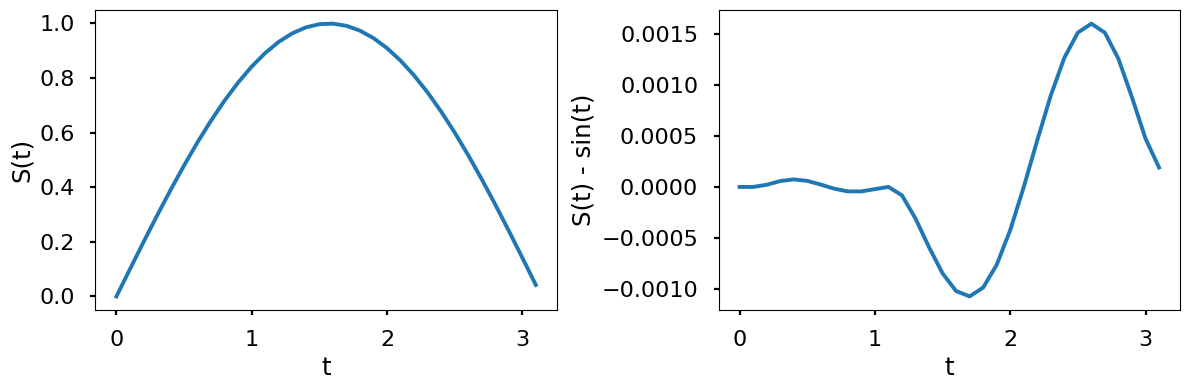

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

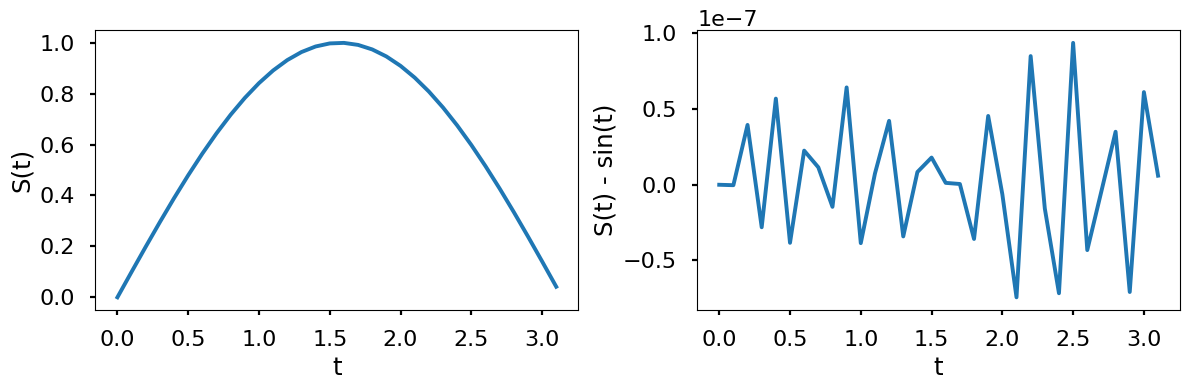

In [5]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)


plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

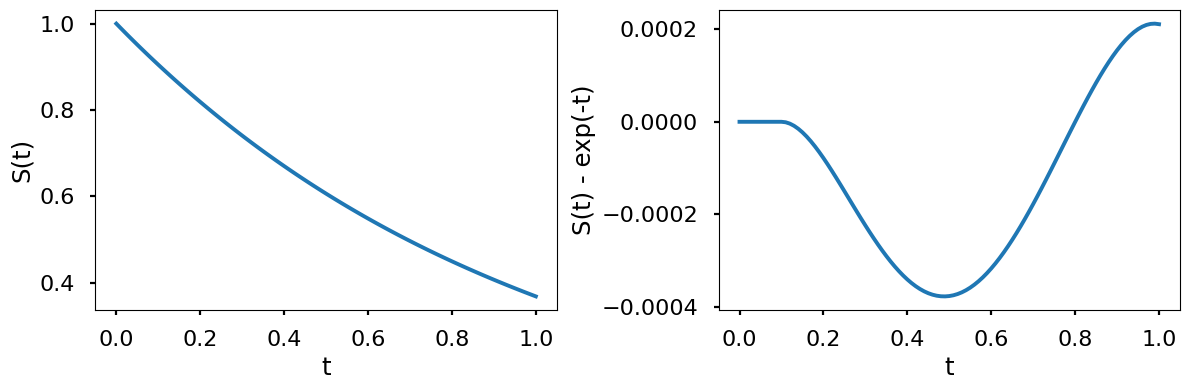

In [6]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

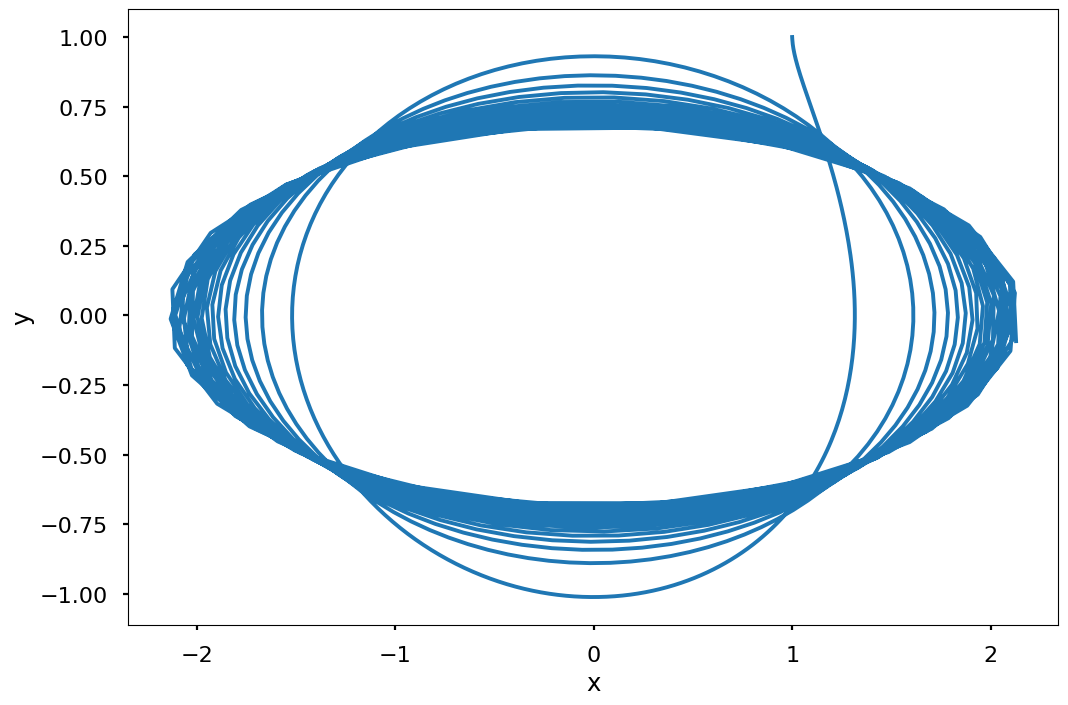

In [7]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()